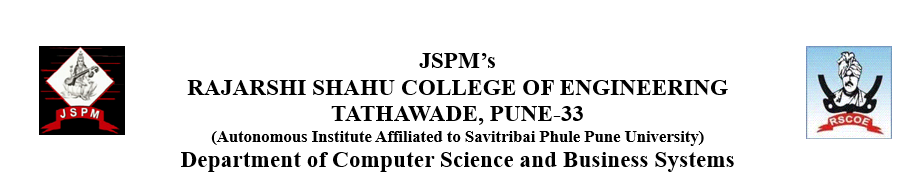

### Name: Bhargavi Satish Bhende

### PRN No.: RBT21CB053

# Problem statement:
Implementing Decision Tree and KNN

#**Red Wine Classification**

##Data Preprocessing

###Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for a cleaner output.
warnings.filterwarnings('ignore')

# Set the style for plotting.
sns.set()
%matplotlib inline

###Step 2: Load the Red Wine Quality dataset.

In [ ]:
df = pd.read_csv('winequality-red.csv') # loading data

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###Step 3: Display basic information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###Step 4: Generate summary statistics for the dataset.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###Step 5: Check for missing values in the dataset.

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Data Distribution Visualization

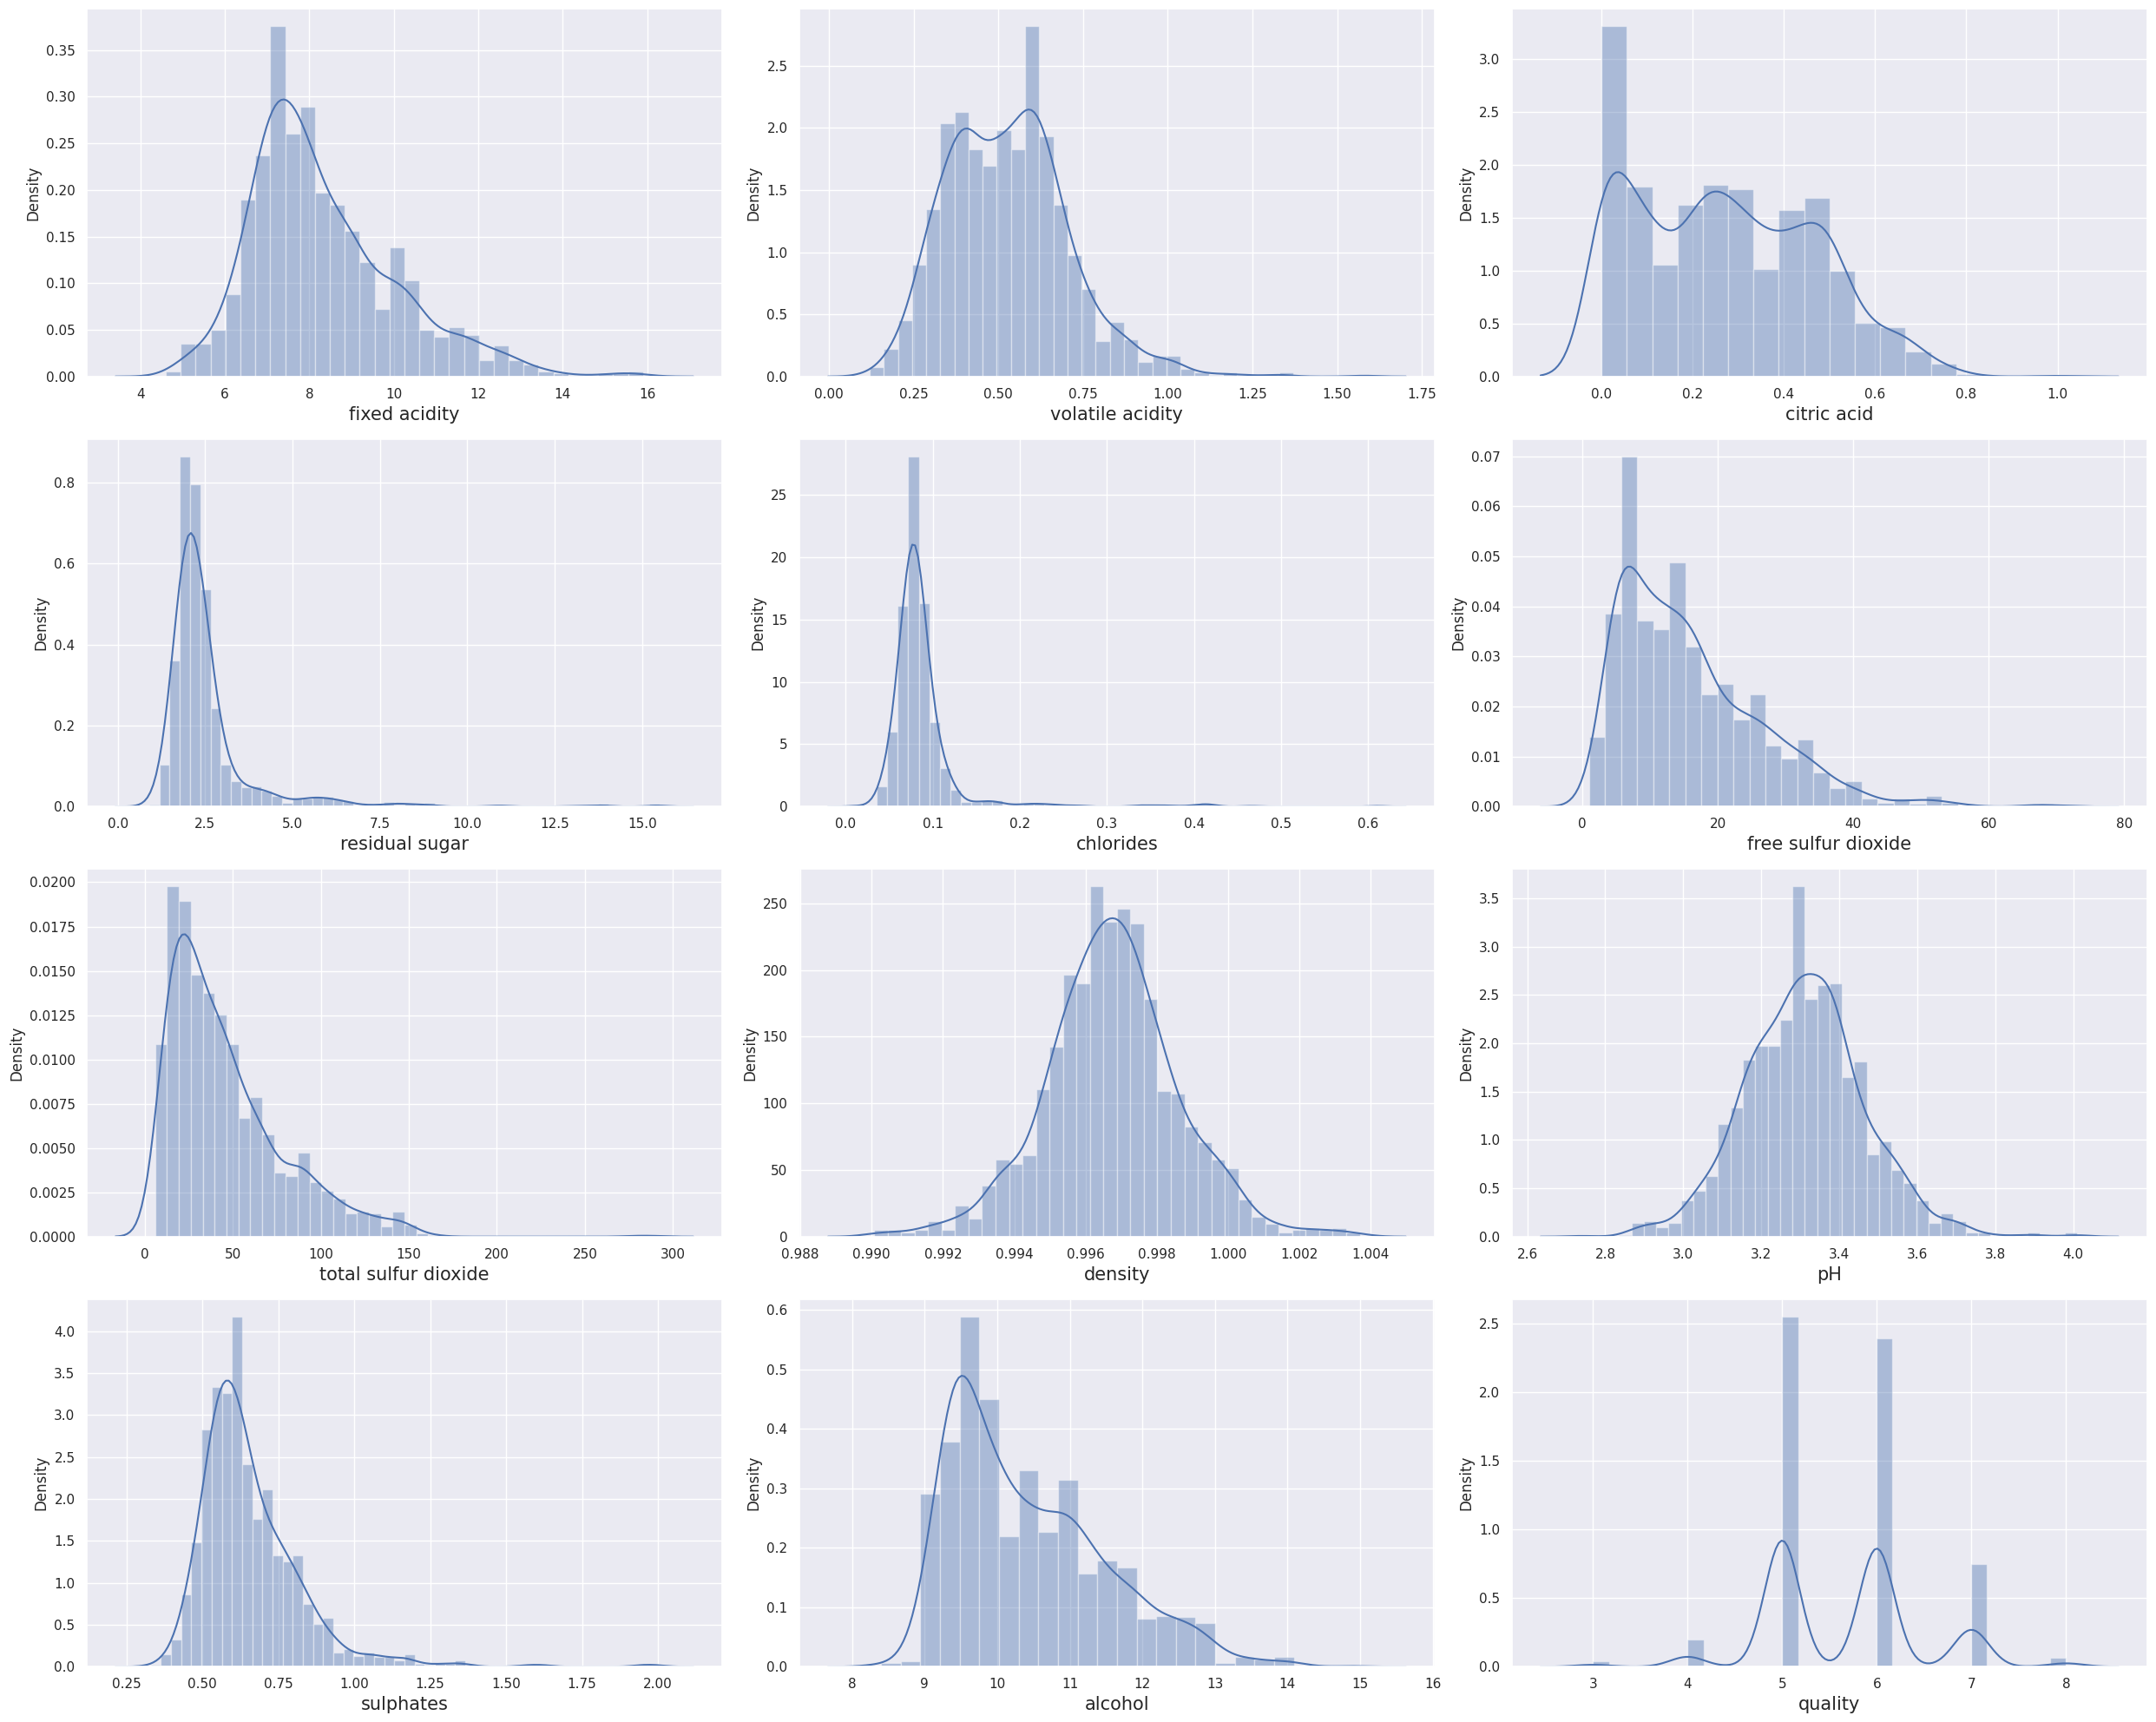

In [ ]:
# Visualize the distribution of each feature.
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

##Correlation Heatmap

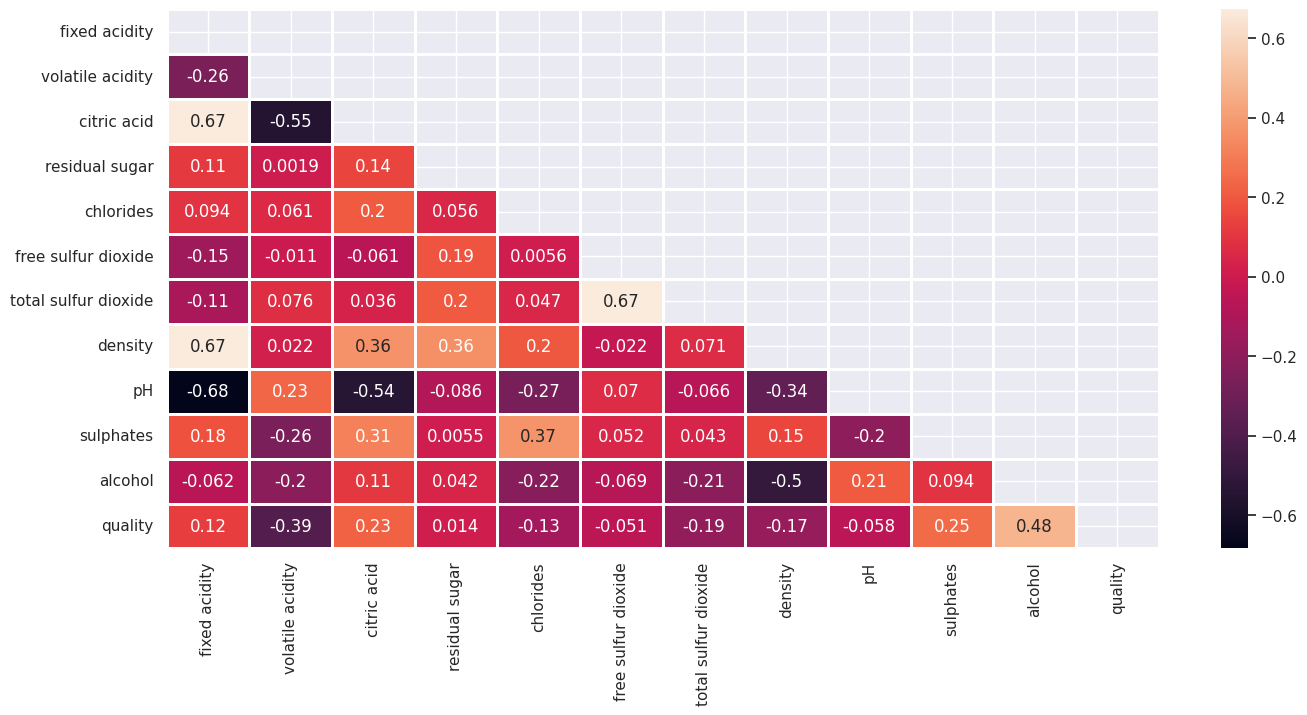

In [ ]:
#Visualize feature correlations using a heatmap
plt.figure(figsize = (16, 7))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

## Data Splitting
- Split the data into training and test sets using stratified sampling.

#### Step 6: Split data into features (X) and target variable (y).

In [ ]:
# creating X and y

X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

## Feature Scaling
- Standardize feature data to have zero mean and unit variance.

### Step 7: Scale the feature data for both training and test sets.

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**KNN**
- K-Nearest Neighbors is a simple yet effective classification algorithm that can be used for both classification and regression tasks. The basic idea behind KNN is to classify a data point by looking at its "k" nearest neighbors in the training data and determining the majority class among those neighbors. Here's how KNN works:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# accuracy score

from sklearn.metrics import accuracy_score

knn_acc_test = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of KNN on Test Data: {knn_acc_test}")

knn_acc_train = accuracy_score(y_train, knn.predict(X_train))
print(f"Accuracy Score of KNN on Training Data: {knn_acc_train}")

Accuracy Score of KNN on Test Data: 0.58
Accuracy Score of KNN on Training Data: 0.700583819849875


#**Decision Tree**
- A Decision Tree is a supervised machine learning algorithm that is used for both classification and regression tasks. It creates a tree-like structure by splitting the data into subsets based on the values of features. The goal is to create decision rules that lead to accurate predictions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy Score of Decision Tree on Test Data: {dtc_acc_test}")

dtc_acc_train = accuracy_score(y_train, dtc.predict(X_train))
print(f"Accuracy Score of Decision Tree on Training Data: {dtc_acc_train}")

Accuracy Score of Decision Tree on Test Data: 0.6425
Accuracy Score of Decision Tree on Training Data: 1.0


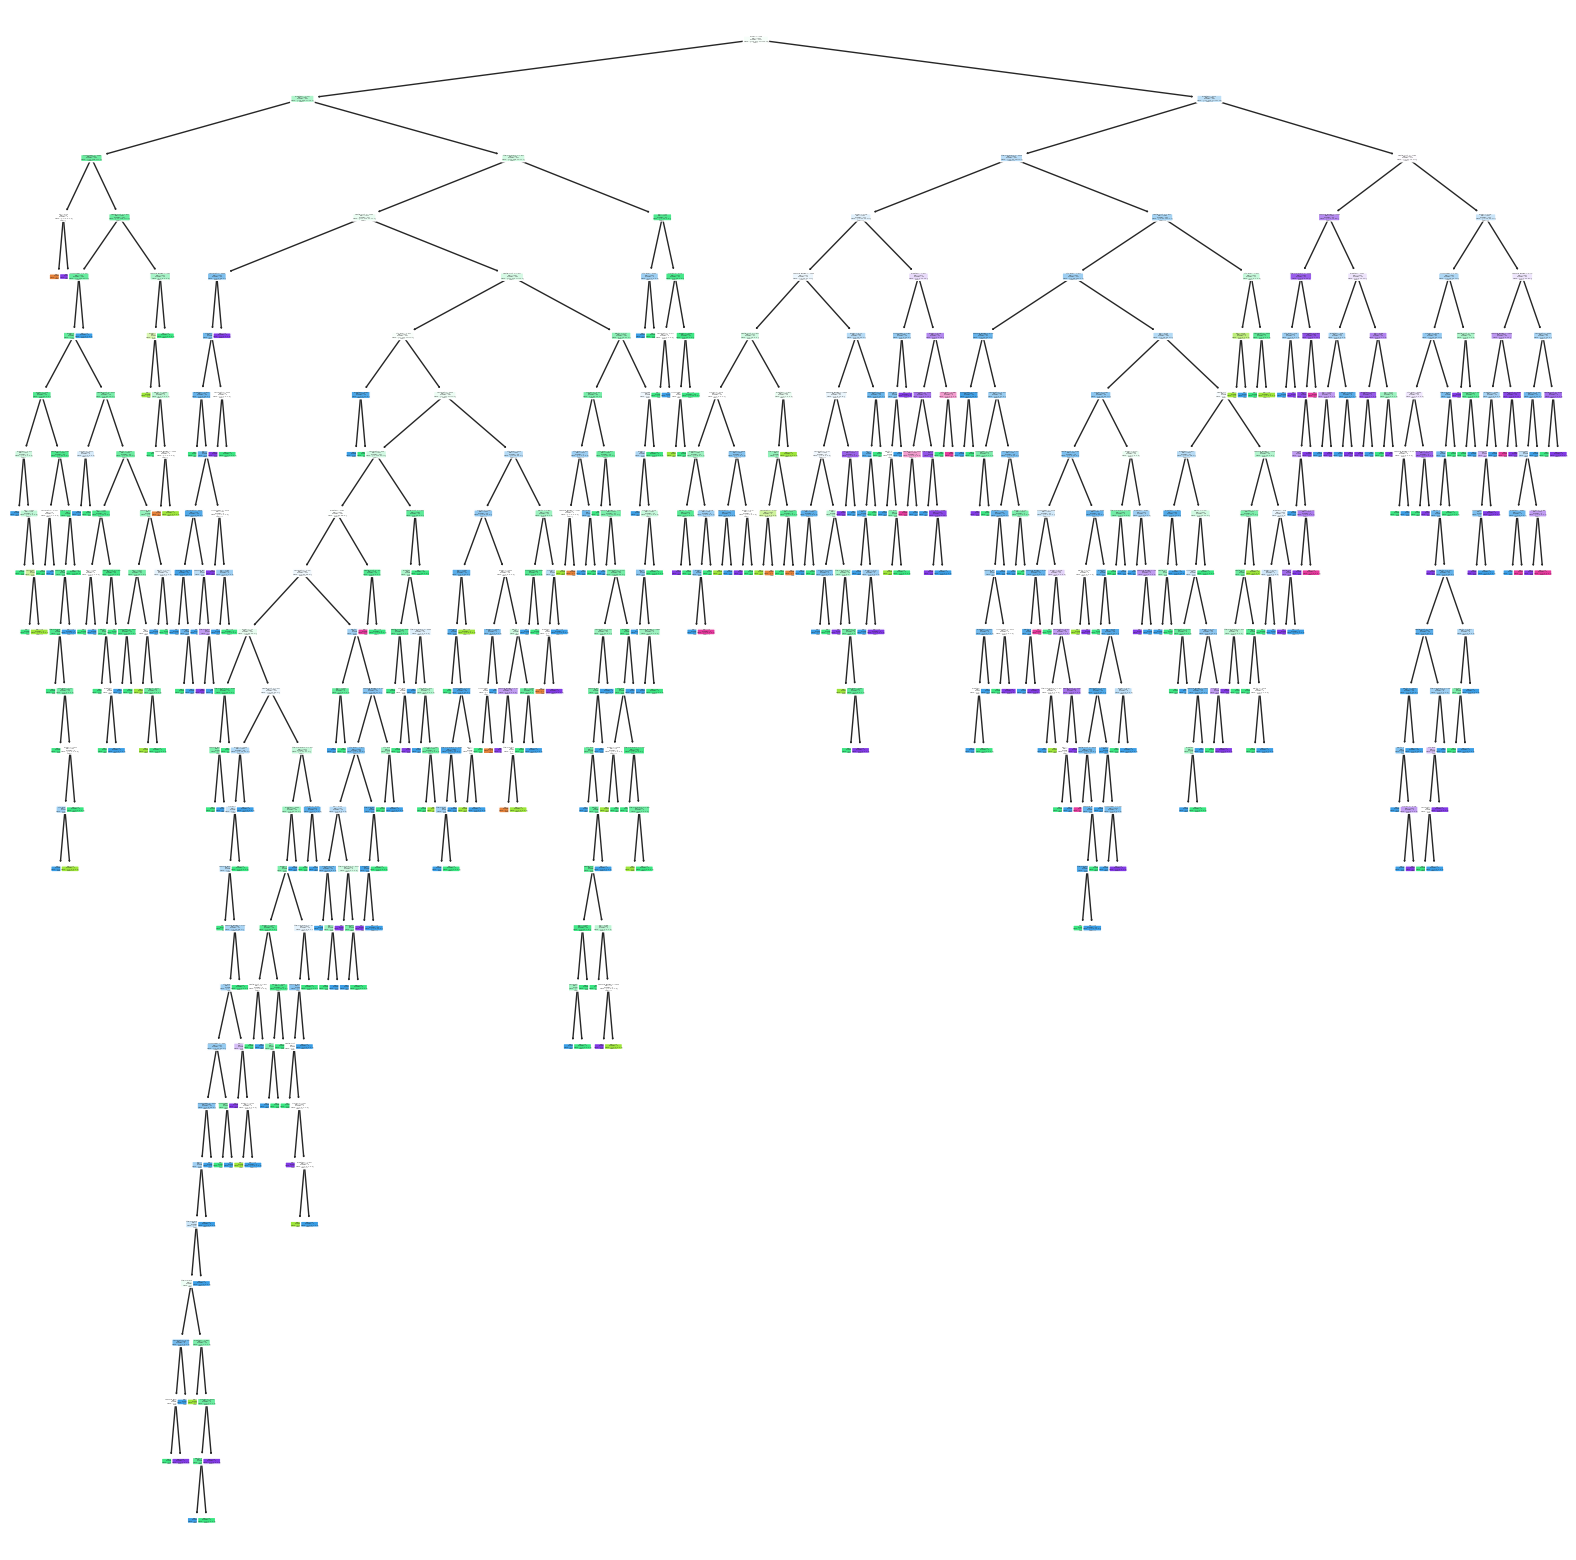

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train a Decision Tree classifier (you may have already done this)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Increase the figure size and plot the Decision Tree
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
plot_tree(dtc, feature_names=X.columns, class_names=str(y.unique()), filled=True, rounded=True)

# Save the high-resolution Decision Tree image as a PNG file
plt.savefig("decision_tree_high_res.png", dpi=300, bbox_inches='tight')  # Adjust the dpi as needed

# Now you can open "decision_tree_high_res.png" in an external image viewer for a clearer view.

##Conclusion

In [ ]:
# Step 14: Conclude the results for KNN.
print("K-Nearest Neighbors (KNN) - Conclusion:")
print(f"Accuracy Score of KNN on Test Data: {knn_acc_test}")
print(f"Accuracy Score of KNN on Training Data: {knn_acc_train}")

# Step 15: Conclude the results for Decision Tree.
print("Decision Tree - Conclusion:")
print(f"Accuracy Score of Decision Tree on Test Data: {dtc_acc_test}")
print(f"Accuracy Score of Decision Tree on Training Data: {dtc_acc_train}")

K-Nearest Neighbors (KNN) - Conclusion:
Accuracy Score of KNN on Test Data: 0.58
Accuracy Score of KNN on Training Data: 0.700583819849875
Decision Tree - Conclusion:
Accuracy Score of Decision Tree on Test Data: 0.6425
Accuracy Score of Decision Tree on Training Data: 1.0
